# PyTorch Tutorial
https://github.com/yunjey/pytorch-tutorial

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

## PyTorch Basics

### 自動微分 1

In [5]:
# create tensors
# Variableは自動微分の対象になる
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

# build a computational graph
y = w * x + b  # y = 2 * x + 3

# compute gradients
y.backward()

# print gradients
print(x.grad)  # dy/dx = w
print(w.grad)  # dy/dw = x
print(b.grad)  # dy/db = 1

Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]



### 自動微分 2

In [33]:
# autograd 2
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# linear layer
linear = nn.Linear(3, 2)
print('w:', linear.weight)
print('b:', linear.bias)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# forward
pred = linear(x)

# compute loss
loss = criterion(pred, y)
print('loss:', loss.data[0])

# backpropagation
loss.backward()

# print out the gradients
print('dL/dw:', linear.weight.grad)
print('dL/db:', linear.bias.grad)

print('*** by hand')
# optimizer.step()の中身は下の計算をしている
# 計算結果が一致する
print(linear.weight.data.sub(0.01 * linear.weight.grad.data))
print(linear.bias.data.sub(0.01 * linear.bias.grad.data))

# gradient descent
optimizer.step()

print('*** by step()')
print(linear.weight)
print(linear.bias)

w: Parameter containing:
-0.0213  0.3410  0.4479
-0.2651  0.4823 -0.2477
[torch.FloatTensor of size 2x3]

b: Parameter containing:
 0.2191
 0.0330
[torch.FloatTensor of size 2]

loss: 0.42183035612106323
dL/dw: Variable containing:
 0.2508  0.3263 -0.0476
 0.4193  0.6737 -0.2881
[torch.FloatTensor of size 2x3]

dL/db: Variable containing:
-0.0772
-0.1106
[torch.FloatTensor of size 2]

*** by hand

-0.0238  0.3377  0.4484
-0.2693  0.4755 -0.2448
[torch.FloatTensor of size 2x3]


 0.2199
 0.0341
[torch.FloatTensor of size 2]

*** by step()
Parameter containing:
-0.0238  0.3377  0.4484
-0.2693  0.4755 -0.2448
[torch.FloatTensor of size 2x3]

Parameter containing:
 0.2199
 0.0341
[torch.FloatTensor of size 2]



### ndarray <=> tensor の相互変換

In [40]:
# Loading data from numpy
a = np.array([[1, 2], [3, 4]])
b = torch.from_numpy(a)  # ndarray => tensor
c = b.numpy()            # tensor  => ndarray
print(type(a))
print(type(b))
print(type(c))
print(a)
print(b)
print(c)

<class 'numpy.ndarray'>
<class 'torch.LongTensor'>
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]

 1  2
 3  4
[torch.LongTensor of size 2x2]

[[1 2]
 [3 4]]


### DatasetとDataLoader

In [56]:
# Implementing the input pipeline
# Download and construct dataset
# Datasetクラスのサブクラス（__getitem__と__len__が実装されている）
train_dataset = dsets.CIFAR10(root='./data',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)

# select one data pair
# ディスクからデータを読む
image, label = train_dataset[0]
print(image.size())
print(label)
print(len(train_dataset))

Files already downloaded and verified
torch.Size([3, 32, 32])
6
50000


In [58]:
# data loader
# Datasetを渡すとバッチ単位でファイルからデータを取り出せる
# num_workersを指定することでマルチプロセッサで並列に読み出せる？
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100,
                                           shuffle=True,
                                           num_workers=2)
data_iter = iter(train_loader)

# ミニバッチ単位で画像とラベルをロード
images, labels = data_iter.next()
print(images.size(), labels.size())

torch.Size([100, 3, 32, 32]) torch.Size([100])


In [59]:
# 実際はiterを使わなくてforループでOK
for images, labels in train_loader:
    print(images.size(), labels.size())
    break

torch.Size([100, 3, 32, 32]) torch.Size([100])


### カスタムデータセット

- `__getitem__()` と `__len__()` を定義する

In [62]:
class CustomDataset(data.Dataset):
    def __init__(self):
        # initialize file path or list of file names.
        pass
    
    def __getitem__(self, index):
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open)
        # 2. Preprocess the data (e.g. torchvision.Transform)
        # 3. Return a data pair (e.g. image and label)
        pass

    def __len__(self):
        # return total size of your dataset
        return 0

custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100,
                                           shuffle=True,
                                           num_workers=2)

### 学習済みモデルを使う

In [63]:
# download and load pretrained resnet
resnet = torchvision.models.resnet18(pretrained=True)

In [64]:
resnet

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [68]:
# finetuneしたいときはパラメータを固定する
for param in resnet.parameters():
    param.requires_grad = False

# topのfc層を置き換える
resnet.fc = nn.Linear(resnet.fc.in_features, 100)

In [74]:
# 新しく追加したfc層のパラメータは更新対象
for param in resnet.fc.parameters():
    print(param.requires_grad)

True
True


In [75]:
# test
images = Variable(torch.randn(10, 3, 256, 256))
outputs = resnet(images)
print(outputs.size())

torch.Size([10, 100])


In [91]:
# 74番目のクラスに分類された
print(np.argmax(outputs[0].data.numpy()))

74


### モデルのセーブとロード

In [92]:
# save and load the entire model
torch.save(resnet, 'model.pkl')
model = torch.load('model.pkl')
print(model)

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [93]:
# save and load only the model parameters
# こちらのほうが推薦されている
# ファイルサイズは変わらない？
torch.save(resnet.state_dict(), 'params.pkl')
resnet.load_state_dict(torch.load('params.pkl'))

## Linear Regression

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

# hyper parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
    # convert numpy array to torch Variable
    # ndarray => Tensor => Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.data[0]))

Epoch [10/60], Loss: 9.3287
Epoch [20/60], Loss: 1.9054
Epoch [30/60], Loss: 0.6859
Epoch [40/60], Loss: 0.4845
Epoch [50/60], Loss: 0.4503
Epoch [60/60], Loss: 0.4435


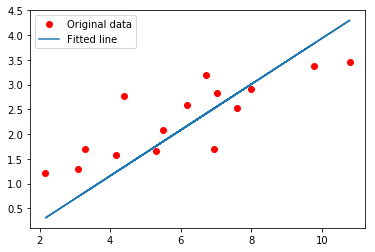

In [5]:
# plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [119]:
# save the model
torch.save(model.state_dict(), 'model.pkl')

## Logistic Regression

In [132]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [133]:
print(len(train_dataset))
print(len(test_dataset))
image, label = iter(train_loader).next()
print(type(image), type(label))
print(image.size(), label.size())

60000
10000
<class 'torch.FloatTensor'> <class 'torch.LongTensor'>
torch.Size([100, 1, 28, 28]) torch.Size([100])


In [136]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        # ここではlogitsを返してsoftmaxを通さないので注意
        # LinearRegressionとまったく同じ
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 2.1991
Epoch: [1/5], Step: [200/600], Loss: 2.1090
Epoch: [1/5], Step: [300/600], Loss: 2.0185
Epoch: [1/5], Step: [400/600], Loss: 1.8627
Epoch: [1/5], Step: [500/600], Loss: 1.8895
Epoch: [1/5], Step: [600/600], Loss: 1.8074
Epoch: [2/5], Step: [100/600], Loss: 1.7375
Epoch: [2/5], Step: [200/600], Loss: 1.6430
Epoch: [2/5], Step: [300/600], Loss: 1.6553
Epoch: [2/5], Step: [400/600], Loss: 1.5521
Epoch: [2/5], Step: [500/600], Loss: 1.6084
Epoch: [2/5], Step: [600/600], Loss: 1.4299
Epoch: [3/5], Step: [100/600], Loss: 1.3624
Epoch: [3/5], Step: [200/600], Loss: 1.3872
Epoch: [3/5], Step: [300/600], Loss: 1.2938
Epoch: [3/5], Step: [400/600], Loss: 1.3767
Epoch: [3/5], Step: [500/600], Loss: 1.2836
Epoch: [3/5], Step: [600/600], Loss: 1.2734
Epoch: [4/5], Step: [100/600], Loss: 1.2175
Epoch: [4/5], Step: [200/600], Loss: 1.1995
Epoch: [4/5], Step: [300/600], Loss: 1.1280
Epoch: [4/5], Step: [400/600], Loss: 1.1507
Epoch: [4/5], Step: [500/600], L

In [145]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    # torch.maxは最大値とそのインデックスの両方を返す
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    # predicted == labelsはByteTensor
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 82 %


In [146]:
# Save the model
torch.save(model.state_dict(), 'model.pkl')

## Feedforward Neural Network

In [147]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False,
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [154]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

net = Net(input_size, hidden_size, num_classes)

In [155]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data[0]))

Epoch [1/5], Step [100/600], Loss: 0.3688
Epoch [1/5], Step [200/600], Loss: 0.2342
Epoch [1/5], Step [300/600], Loss: 0.1315
Epoch [1/5], Step [400/600], Loss: 0.1842
Epoch [1/5], Step [500/600], Loss: 0.1777
Epoch [1/5], Step [600/600], Loss: 0.1968
Epoch [2/5], Step [100/600], Loss: 0.1537
Epoch [2/5], Step [200/600], Loss: 0.1552
Epoch [2/5], Step [300/600], Loss: 0.1092
Epoch [2/5], Step [400/600], Loss: 0.0898
Epoch [2/5], Step [500/600], Loss: 0.1120
Epoch [2/5], Step [600/600], Loss: 0.2084
Epoch [3/5], Step [100/600], Loss: 0.0941
Epoch [3/5], Step [200/600], Loss: 0.1204
Epoch [3/5], Step [300/600], Loss: 0.0847
Epoch [3/5], Step [400/600], Loss: 0.0379
Epoch [3/5], Step [500/600], Loss: 0.0408
Epoch [3/5], Step [600/600], Loss: 0.0791
Epoch [4/5], Step [100/600], Loss: 0.0432
Epoch [4/5], Step [200/600], Loss: 0.0607
Epoch [4/5], Step [300/600], Loss: 0.0792
Epoch [4/5], Step [400/600], Loss: 0.0530
Epoch [4/5], Step [500/600], Loss: 0.0659
Epoch [4/5], Step [600/600], Loss:

In [156]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(net.state_dict(), 'model.pkl')

Accuracy of the network on the 10000 test images: 97 %


## Convolutional Neural Network

In [15]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Hyper Parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # [Conv > BN > ReLU > Pool] のブロックをまとめられる
        # in:[N, 1, 28, 28] out:[N, 16, 14, 14]
        self.layer1 = nn.Sequential(
            # PyTorchではin_channel, out_channelの両方とも明示する必要あり
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            # PyTorchではBatchNormも入力のfeatures数を明示する必要あり
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        # in:[N, 16, 14, 14] out:[N, 32, 7, 7]
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        # in:[N, 7*7*32] out:[N, 10]
        self.fc = nn.Linear(7 * 7 * 32, 10)
    
    def forward(self, x):
#         print('in:', x.size())
        out = self.layer1(x)
#         print('out layer1:', out.size())
        out = self.layer2(out)
#         print('out layer2:', out.size())
        out = out.view(out.size(0), -1)
        out = self.fc(out)
#         print('out fc:', out.size())
        return out

cnn = CNN()

# モデルの各層のテンソルサイズを見たいときはダミーの入力を渡すと簡単
# images, labels = iter(test_loader).next()
# cnn(Variable(images))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data[0]))

# Test the Model
# BNを使っているときはモデルをevalモードにする
cnn.eval()

correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Trained Model
torch.save(cnn.state_dict(), 'cnn.pkl')

Epoch [1/5], Iter [100/600] Loss: 0.1731
Epoch [1/5], Iter [200/600] Loss: 0.1133
Epoch [1/5], Iter [300/600] Loss: 0.0820
Epoch [1/5], Iter [400/600] Loss: 0.0718
Epoch [1/5], Iter [500/600] Loss: 0.0273
Epoch [1/5], Iter [600/600] Loss: 0.0293
Epoch [2/5], Iter [100/600] Loss: 0.0405
Epoch [2/5], Iter [200/600] Loss: 0.0985
Epoch [2/5], Iter [300/600] Loss: 0.0085
Epoch [2/5], Iter [400/600] Loss: 0.0209
Epoch [2/5], Iter [500/600] Loss: 0.0563
Epoch [2/5], Iter [600/600] Loss: 0.0210
Epoch [3/5], Iter [100/600] Loss: 0.0162
Epoch [3/5], Iter [200/600] Loss: 0.0455
Epoch [3/5], Iter [300/600] Loss: 0.0174
Epoch [3/5], Iter [400/600] Loss: 0.0038
Epoch [3/5], Iter [500/600] Loss: 0.0182
Epoch [3/5], Iter [600/600] Loss: 0.0953
Epoch [4/5], Iter [100/600] Loss: 0.0089
Epoch [4/5], Iter [200/600] Loss: 0.0121
Epoch [4/5], Iter [300/600] Loss: 0.0560
Epoch [4/5], Iter [400/600] Loss: 0.0060
Epoch [4/5], Iter [500/600] Loss: 0.0140
Epoch [4/5], Iter [600/600] Loss: 0.0047
Epoch [5/5], Ite

## ResNet

In [58]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Image Processing
# Data Augmentation
transform = transforms.Compose([
    transforms.Scale(40),  # 少し大きめに拡張してランダムクロップする
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = dsets.CIFAR10(root='./data/',
                              train=True,
                              transform=transform,
                              download=True)

# テストデータは Data Augmentation しない
test_dataset = dsets.CIFAR10(root='./data/',
                             train=False,
                             transform=transforms.ToTensor())

# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
    
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        # 入力のresidualを足し込めるようにサイズやチャネル数を調整するdownsampleを入れる
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet Module
class ResNet(nn.Module):
    def __init__(self, block, layers=[2, 2, 2], num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 64, layers[2], stride=2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        # チャネル数が変化するタイミングでdownsampleを入れる
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        # 残りはin_channels == out_channelsなのでdownsampleは入らない
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
            
    def forward(self, x):
#         print('x:', x.size())       # (N, 3, 32, 32)
        out = self.conv(x)  
#         print('out1:', out.size())  # (N, 16, 32, 32)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
#         print('out2:', out.size())  # (N, 16, 32, 32)
        out = self.layer2(out)      # stride=2なのでサイズは半分になる
#         print('out3:', out.size())  # (N, 32, 16, 16)
        out = self.layer3(out)      # stride=2なのでサイズは半分になる
#         print('out4:', out.size())  # (N, 64, 8, 8)
        out = self.avg_pool(out)
#         print('out5:', out.size())  # (N, 64, 1, 1)
        out = out.view(out.size(0), -1)
#         print('out6:', out.size())  # (N, 64)
        out = self.fc(out)
#         print('out7:', out.size())  # (N, 10)
        return out

resnet = ResNet(ResidualBlock, [2, 2, 2])

criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(resnet.parameters(), lr=lr)

# training
for epoch in range(80):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ("Epoch [%d/%d], Iter [%d/%d] Loss: %.4f" %(epoch + 1, 80, i + 1, 500, loss.data[0]))

    # decaying learning rate
    if (epoch + 1) % 20 == 0:
        lr /= 3
        optimizer = torch.optim.Adam(resnet.parameters(), lr=lr)

# Test
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = resnet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(resnet.state_dict(), 'resnet.pkl')

Files already downloaded and verified


In [59]:
# resnet = ResNet(ResidualBlock, [2, 2, 2])
# images, labels = iter(test_loader).next()
# out = resnet(Variable(images))

In [60]:
resnet

ResNet (
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (layer1): Sequential (
    (0): ResidualBlock (
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): ResidualBlock (
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    )
  )
  (layer2): Sequential (
   

## Recurrent Neural Network

In [31]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Hyper parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# RNN Model (Many-to-One)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # num_layersが1より大きい場合はStacked LSTMになる
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # x: (batch, seq_len, input_size)
        # 入力はinput_sizeの特徴ベクトルのシーケンス

        # set initial states
        # バッチ内のサンプルごとに状態を別々に管理している
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
#         print('h0:', h0.size())
#         print('c0:', c0.size())

        # forward propagate RNN
        out, _ = self.lstm(x, (h0, c0))
#         print('out1:', out.size())

        # decode hidden state of last time step
        # 入力の各シーケンスごとに出力されている
        # many-to-oneの場合は最後の出力を使う
        # out: (batch, seq_len, hidden_size)
        out = self.fc(out[:, -1, :])        
#         print('out2:', out.size())

        return out

rnn = RNN(input_size, hidden_size, num_layers, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, sequence_length, input_size))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = rnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data[0]))

Epoch [1/2], Step [100/600], Loss: 0.7648
Epoch [1/2], Step [200/600], Loss: 0.2547
Epoch [1/2], Step [300/600], Loss: 0.1060
Epoch [1/2], Step [400/600], Loss: 0.0535
Epoch [1/2], Step [500/600], Loss: 0.1770
Epoch [1/2], Step [600/600], Loss: 0.1920
Epoch [2/2], Step [100/600], Loss: 0.0510
Epoch [2/2], Step [200/600], Loss: 0.1051
Epoch [2/2], Step [300/600], Loss: 0.1339
Epoch [2/2], Step [400/600], Loss: 0.0542
Epoch [2/2], Step [500/600], Loss: 0.0500
Epoch [2/2], Step [600/600], Loss: 0.0963


In [28]:
# test
images, labels = iter(train_loader).next()
print(images.size(), labels.size())
# 28x28の画像を28次元ベクトルの長さ28の系列とみなす
images = images.view(-1, 28, 28)
print(images.size())
rnn(Variable(images))

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 28, 28])
h0: torch.Size([2, 100, 128])
c0: torch.Size([2, 100, 128])
out1: torch.Size([100, 28, 128])
out2: torch.Size([100, 10])


Variable containing:
 0.0506  0.0622  0.0198  ...  -0.0239 -0.0965 -0.0603
 0.0492  0.0620  0.0196  ...  -0.0211 -0.0951 -0.0617
 0.0524  0.0628  0.0167  ...  -0.0242 -0.1008 -0.0589
          ...             ⋱             ...          
 0.0528  0.0645  0.0128  ...  -0.0219 -0.1035 -0.0592
 0.0513  0.0617  0.0169  ...  -0.0242 -0.0984 -0.0606
 0.0522  0.0627  0.0167  ...  -0.0234 -0.1011 -0.0591
[torch.FloatTensor of size 100x10]

In [32]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, sequence_length, input_size))
    outputs = rnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 

# Save the Model
torch.save(rnn.state_dict(), 'rnn.pkl')

Test Accuracy of the model on the 10000 test images: 96 %


## Bidirectional RNN

In [37]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.003

# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, bidirectional=True)
        # bidirectionalのときは出力が順方向と逆方向で2倍になる
        self.fc = nn.Linear(hidden_size * 2, num_classes)
    
    def forward(self, x):
        # set initial states
        h0 = Variable(torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size))
        c0 = Variable(torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size))
        
        # forward propagate RNN
        out, _ = self.lstm(x, (h0, c0))
        
        # decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

rnn = BiRNN(input_size, hidden_size, num_layers, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, sequence_length, input_size))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = rnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data[0]))

Epoch [1/2], Step [100/600], Loss: 0.7885
Epoch [1/2], Step [200/600], Loss: 0.2718
Epoch [1/2], Step [300/600], Loss: 0.2205
Epoch [1/2], Step [400/600], Loss: 0.3021
Epoch [1/2], Step [500/600], Loss: 0.1091
Epoch [1/2], Step [600/600], Loss: 0.1574
Epoch [2/2], Step [100/600], Loss: 0.1384
Epoch [2/2], Step [200/600], Loss: 0.0712
Epoch [2/2], Step [300/600], Loss: 0.0799
Epoch [2/2], Step [400/600], Loss: 0.0320
Epoch [2/2], Step [500/600], Loss: 0.0132
Epoch [2/2], Step [600/600], Loss: 0.1111


In [36]:
rnn

BiRNN(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=10)
)

In [38]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, sequence_length, input_size))
    outputs = rnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 

# Save the Model
torch.save(rnn.state_dict(), 'rnn.pkl')

Test Accuracy of the model on the 10000 test images: 97 %
